# **<center>Análisis Exploratorio (EDA)</center>**

El objetivo del proyecto es analizar el desempeño de los estudiantes y cómo afectan factores como el género, nivel de estudios de los padres, lunch y asistencia a cursos de preparación en los resultados de sus evaluaciones.<br>
Para llevar a cabo el análisis exploratorio es importante realizar una serie de pasos que nos permitirán obtener un análisis certero. De manera que se deben analizar ciertos valores del dataset como son: los tipos de datos que contiene, evaluar la existencia de valores nulos, datos repetidos, las estadísticas generales, las diferentes categorías en las que están divididos, sus atributos y la correlación que existe entre ellos.

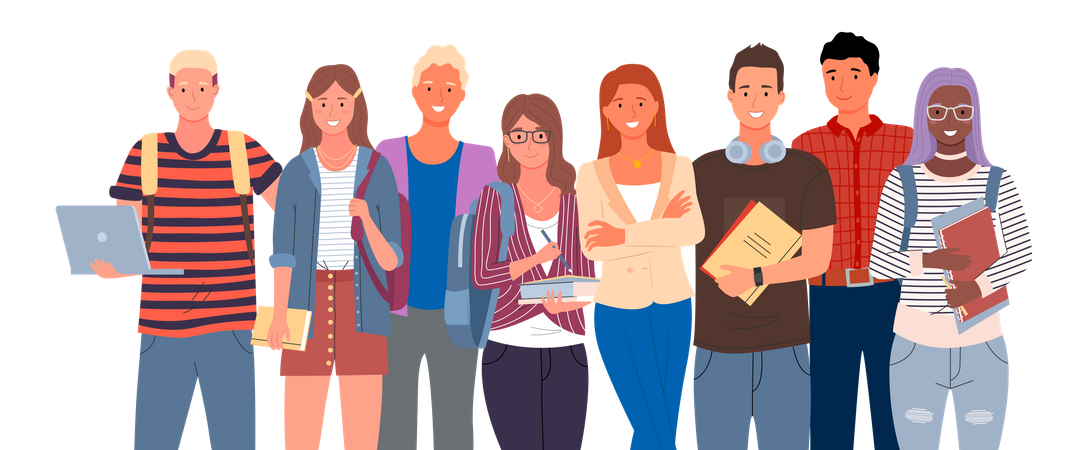

## <center>Dataset:</center>
El dataset contiene los siguientes atributos:
* Género de los estudiantes.
* Etnia o raza (Grupos A,B,C,D,E).
* Nivel de Estudios de los padres.
* Lunch antes de realizar el examen.
* Curso de preparación para el examen (completado o no).
* Puntuación en matemáticas.
* Puntuación de lectura.
* Puntuación en escritura.


### Setup

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv('data/StudentsPerformance.csv')

## <center>Entendimiento de los datos</center>

In [46]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [47]:
# Analizamos la estructura de nuestro data frame, para ver si contiene valores nulos, los tipos de objetos y las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
# Obtenemos un análisis estadístico de los datos numéricos de nuestro data frame

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [49]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [50]:
df.value_counts('gender').reset_index(name= 'count')

,gender,count
0,female,518
1,male,482


In [51]:
df.value_counts('race_ethnicity').reset_index(name= 'count')

,race_ethnicity,count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


***
## <center>Limpieza de los datos</center>

* Drop de columnas y filas irrelevantes
* Identificar columnas duplicadas
* Renombrar valores de columnas

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Cambiando los valores y nombres a unos mas cómodos

In [53]:
df = df.rename(columns={
                        'race_ethnicity': 'ethnicity',
                        'parental_level_of_education': 'parent_education',
                        'test_preparation_course': 'preparation'
                        })

In [54]:
df = (
    df
    .assign(
        ethnicity = lambda df: df.ethnicity.replace(
            ['group A', 'group B', 'group C', 'group D', 'group E'],
            ['A', 'B', 'C', 'D', 'E']
        )
    )
)

### Verificando valores nulos

In [55]:
df.isnull().sum().reset_index()

,index,0
0,gender,0
1,ethnicity,0
2,parent_education,0
3,lunch,0
4,preparation,0
5,math_score,0
6,reading_score,0
7,writing_score,0


In [56]:
pd.isna(df).sum().reset_index(name= 'count')

,index,count
0,gender,0
1,ethnicity,0
2,parent_education,0
3,lunch,0
4,preparation,0
5,math_score,0
6,reading_score,0
7,writing_score,0


### Verificando duplicados

In [57]:
df.loc[df.duplicated()]

# No es necesario analizar duplicados por columna ya que por la naturaleza del data set, se permiten registros duplicados en las columnas

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score


### Conclusiones del proceso de limpieza

* Se cambió el nombre de algunas columnas para una mejor manipulación de estas

* Se verificó que no existieran valores duplicados

* Se verificó que no existieran valores nulos

* Se verificó que no existieran valores numéricos NaN

***
## <center>Análisis univariado</center>

* Gráficas de las distribuciones
    * Histogramas
    * KDE
    * Boxplot

In [58]:
df.head()

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75


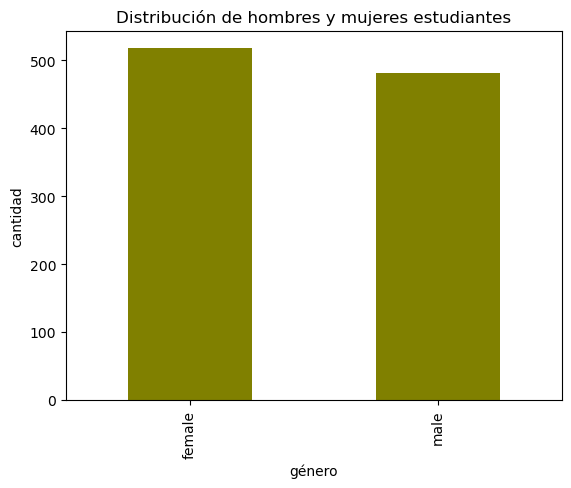

In [59]:
gender_plot = df['gender'].value_counts() \
    .plot(kind = "bar", title = 'Distribución de hombres y mujeres estudiantes', color="olive")

gender_plot.set_xlabel('género')
gender_plot.set_ylabel('cantidad')

plt.show()

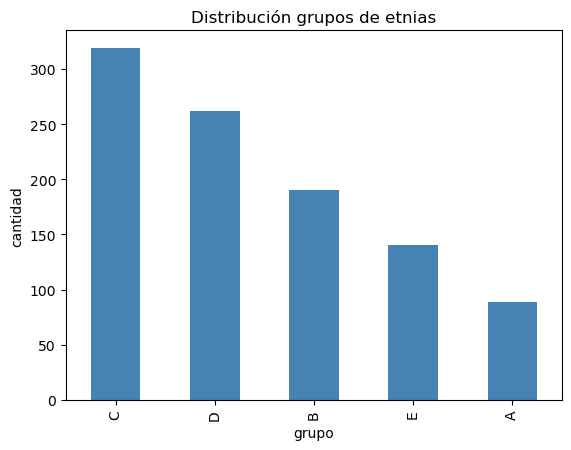

In [60]:
eth_plot = df['ethnicity'].value_counts() \
    .plot(kind = "bar", title = 'Distribución grupos de etnias', color="steelblue")

eth_plot.set_xlabel('grupo')
eth_plot.set_ylabel('cantidad')

plt.show()

La mayoría de los estudiantes pertenecen al grupo étnico C

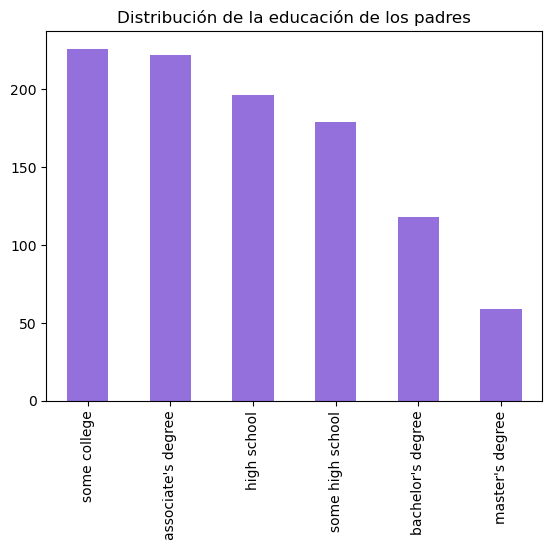

In [61]:
parent_plot = df['parent_education'].value_counts() \
                .plot(kind="bar", title="Distribución de la educación de los padres", color="mediumpurple")
                

Podemos ver que la mayoría de los padres de los estudiantes tienen un nivel educativo entre preparatoria y universidad

<Axes: xlabel='lunch', ylabel='count'>

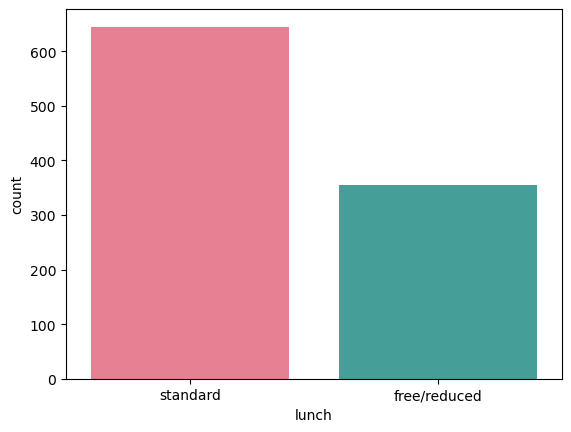

In [62]:
sns.countplot(data=df, x='lunch', palette="husl")

La mayoría de los estudiantes tienen un lunch standard

<Axes: xlabel='preparation', ylabel='count'>

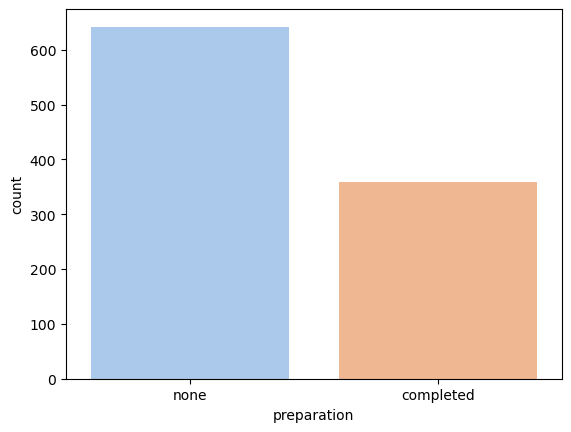

In [63]:
sns.countplot(data=df, x='preparation', palette="pastel")

La mayoría de los estudiantes **no** recibieron alguna preparación

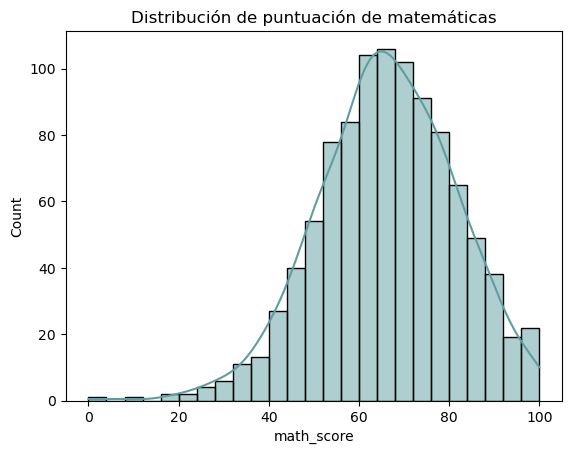

In [64]:
sns.histplot(data=df, x='math_score', color="cadetblue", kde=True)
plt.title('Distribución de puntuación de matemáticas')
plt.show()

Podemos ver que la mayoría de los estudiantes obtuvieron una puntuación de 60 a 80 en matemáticas

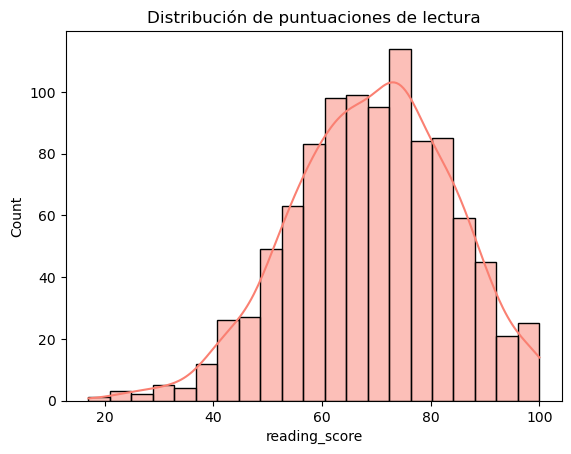

In [65]:
sns.histplot(data=df, x="reading_score", color='salmon', kde=True)
plt.title('Distribución de puntuaciones de lectura')
plt.show()

La mayoría de las puntuaciones se encuentran entre 60 y 80 en el examen de lectura

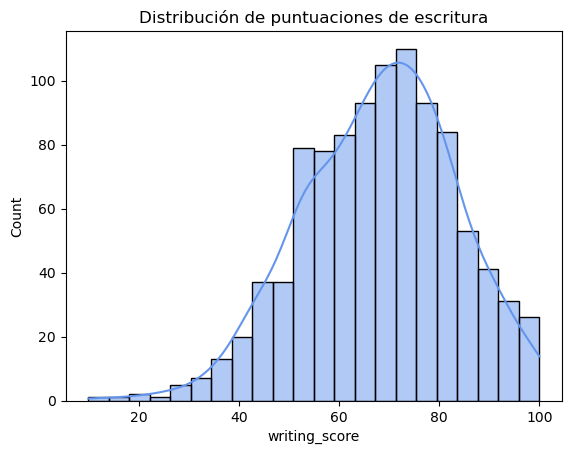

In [66]:
sns.histplot(data=df, x='writing_score', color='cornflowerblue', kde=True)
plt.title('Distribución de puntuaciones de escritura')
plt.show()

Podemos observar que la mayoría de los estudiantes tiene una calificación entre 60 y 80 en el examen de escritura

### Graficando conclusiones de los análisis de las calificaciones por separado

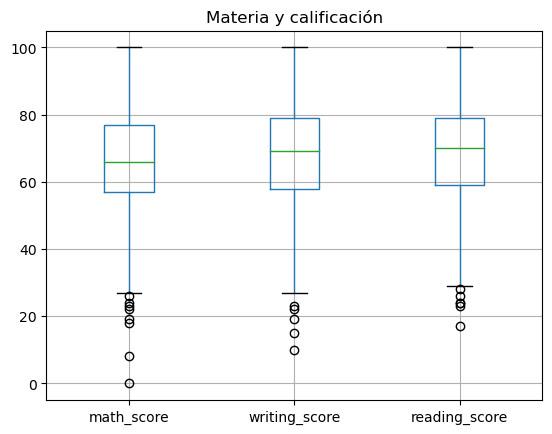

In [67]:
df[['math_score', 'writing_score', 'reading_score']].boxplot()
plt.title('Materia y calificación')
plt.show()

Se confirma que las calificaciones medias en los 3 exámenes se encuentran entre 60 y 80

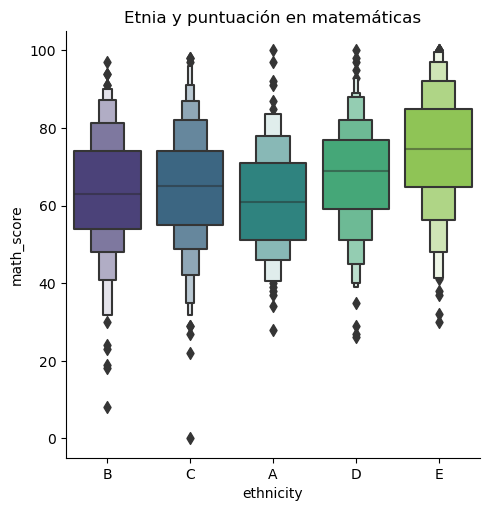

In [85]:
sns.catplot(data=df, x='ethnicity', y='math_score', kind="boxen", palette="viridis")
plt.title('Etnia y puntuación en matemáticas')
plt.show()

Se puede notar que la media más alta de calificaciones la tiene el grupo étnico E

In [69]:
df['average'] = round((df['math_score'] + df['reading_score'] + df['writing_score']) / 3,3)
df

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score,average
0,female,B,bachelor's degree,standard,none,72,72,74,72.667
1,female,C,some college,standard,completed,69,90,88,82.333
2,female,B,master's degree,standard,none,90,95,93,92.667
3,male,A,associate's degree,free/reduced,none,47,57,44,49.333
4,male,C,some college,standard,none,76,78,75,76.333
...,...,...,...,...,...,...,...,...,...
995,female,E,master's degree,standard,completed,88,99,95,94.000
996,male,C,high school,free/reduced,none,62,55,55,57.333
997,female,C,high school,free/reduced,completed,59,71,65,65.000
998,female,D,some college,standard,completed,68,78,77,74.333


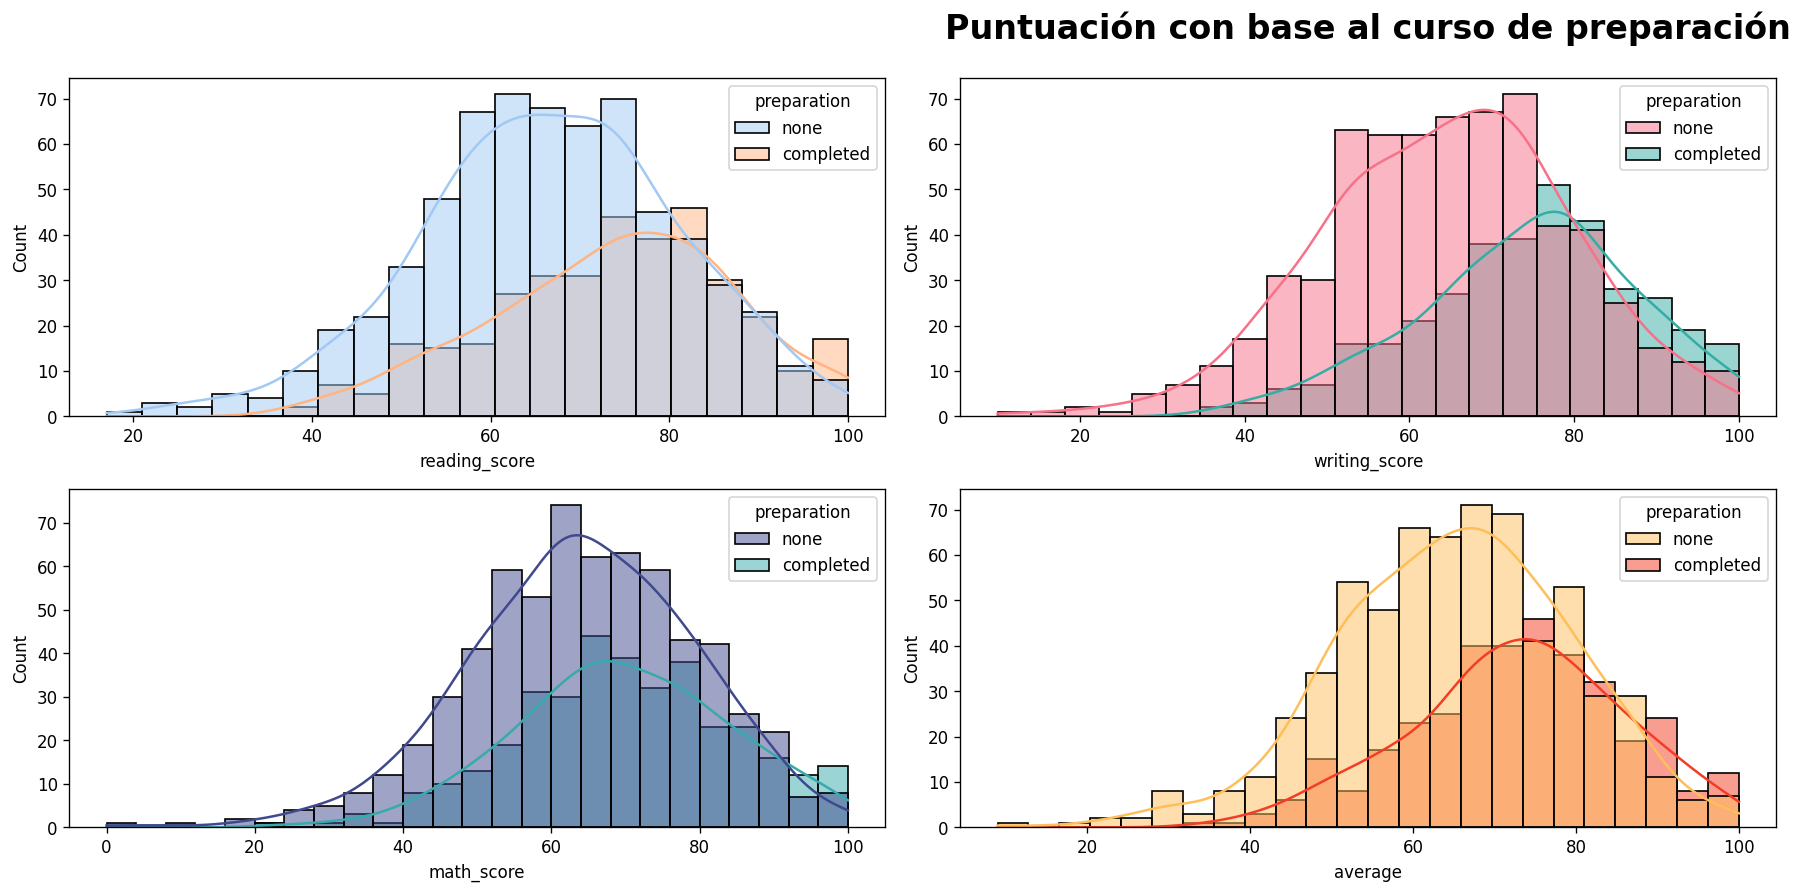

In [99]:
fig, axs = plt.subplots(2, 2, figsize = (15, 7), dpi=120)

sns.histplot(x = 'math_score',data=df ,ax = axs[1][0],hue ='preparation',palette="mako",kde = True)
sns.histplot(x = 'reading_score',data =df ,ax = axs[0][0] ,hue ='preparation',palette="pastel",kde = True)
sns.histplot(x = 'writing_score',data =df ,ax = axs[0][1],hue ='preparation',palette="husl",kde = True)
sns.histplot(x = 'average',data =df ,ax = axs[1][1],hue ='preparation',palette="YlOrRd",kde = True)

plt.tight_layout()
plt.title('Puntuación con base al curso de preparación', fontsize=20, fontweight='bold',y=2.3)
plt.show()


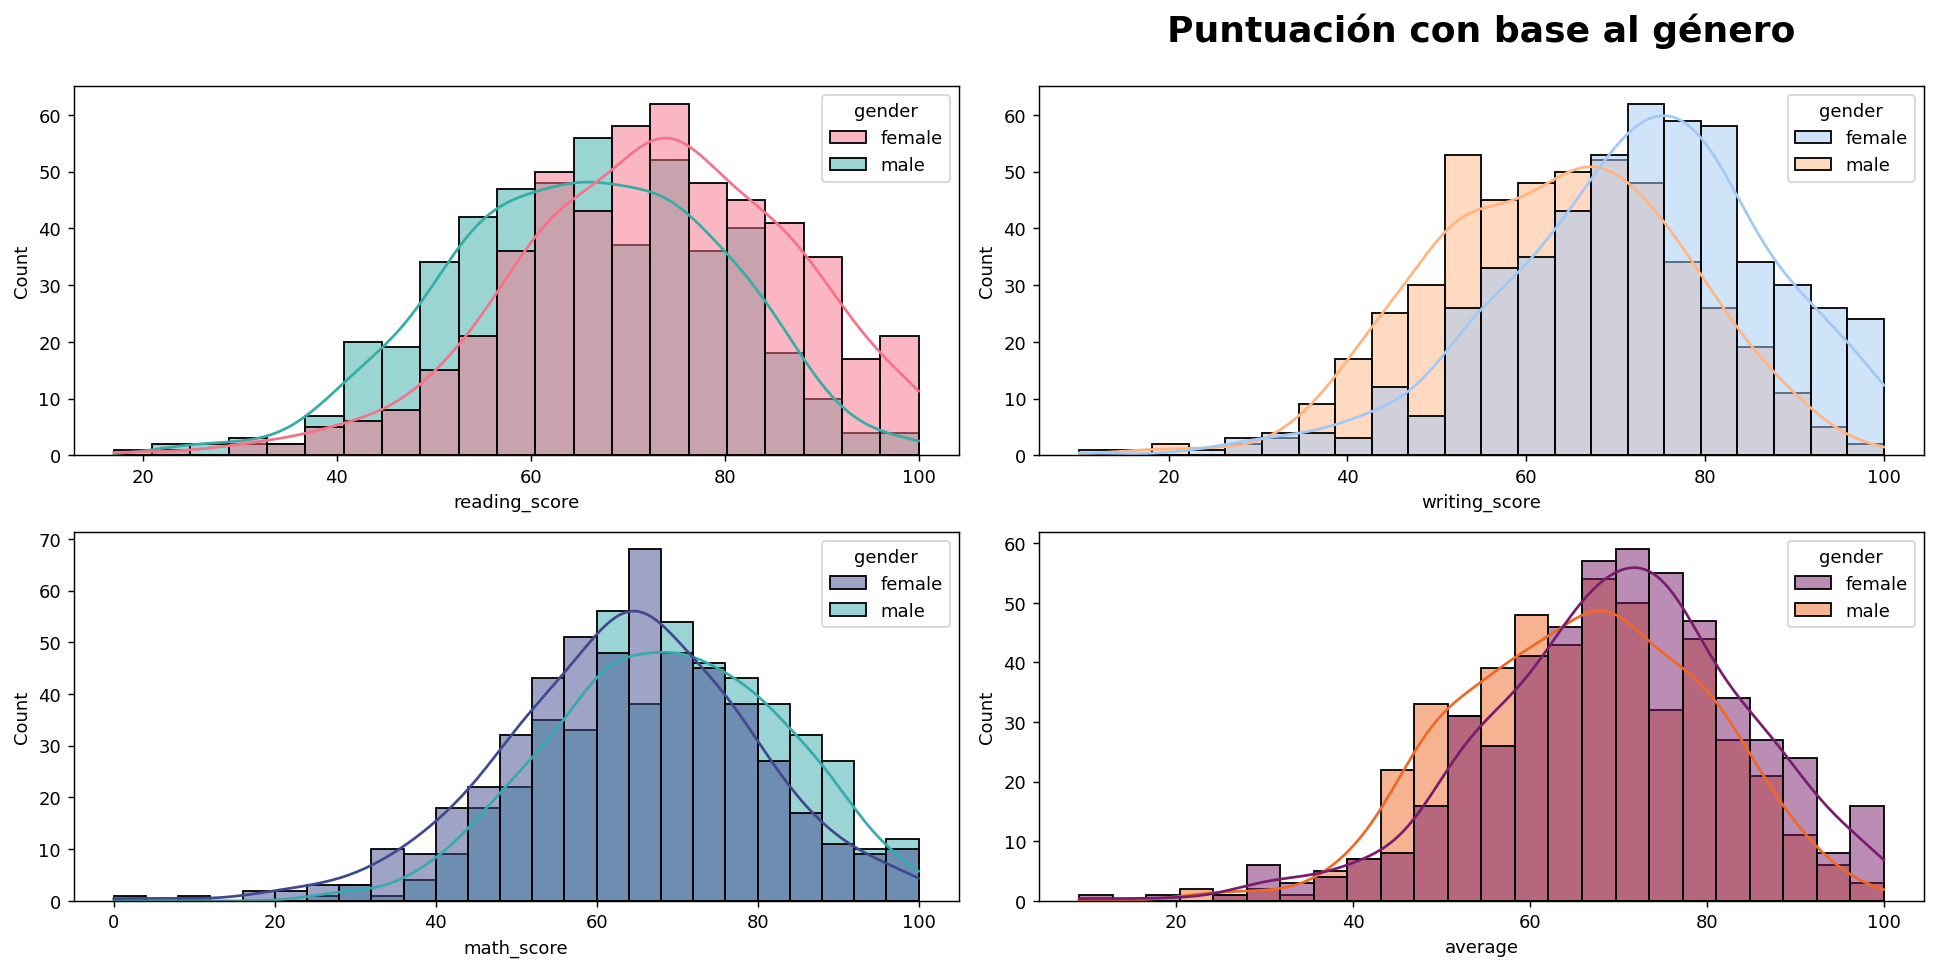

In [100]:
fig, axs = plt.subplots(2, 2, figsize = (15, 7),dpi = 130)

sns.histplot(x = 'math_score' ,data =df ,ax = axs[1][0],hue ='gender',palette="mako", kde = True)
sns.histplot(x = 'writing_score' ,data =df, ax = axs[0][1],hue ='gender',palette="pastel", kde = True)
sns.histplot(x = 'reading_score' ,data =df,ax = axs[0][0] ,hue ='gender',palette="husl",kde = True)
sns.histplot(x = 'average',data =df ,ax = axs[1][1],hue ='gender',palette="inferno",kde = True)

plt.tight_layout()
plt.title('Puntuación con base al género', fontsize=20, fontweight='bold',y=2.3)
plt.show()

## <center>Análisis multi-variable</center>

### Relación entre variables categóricas y las puntuaciones

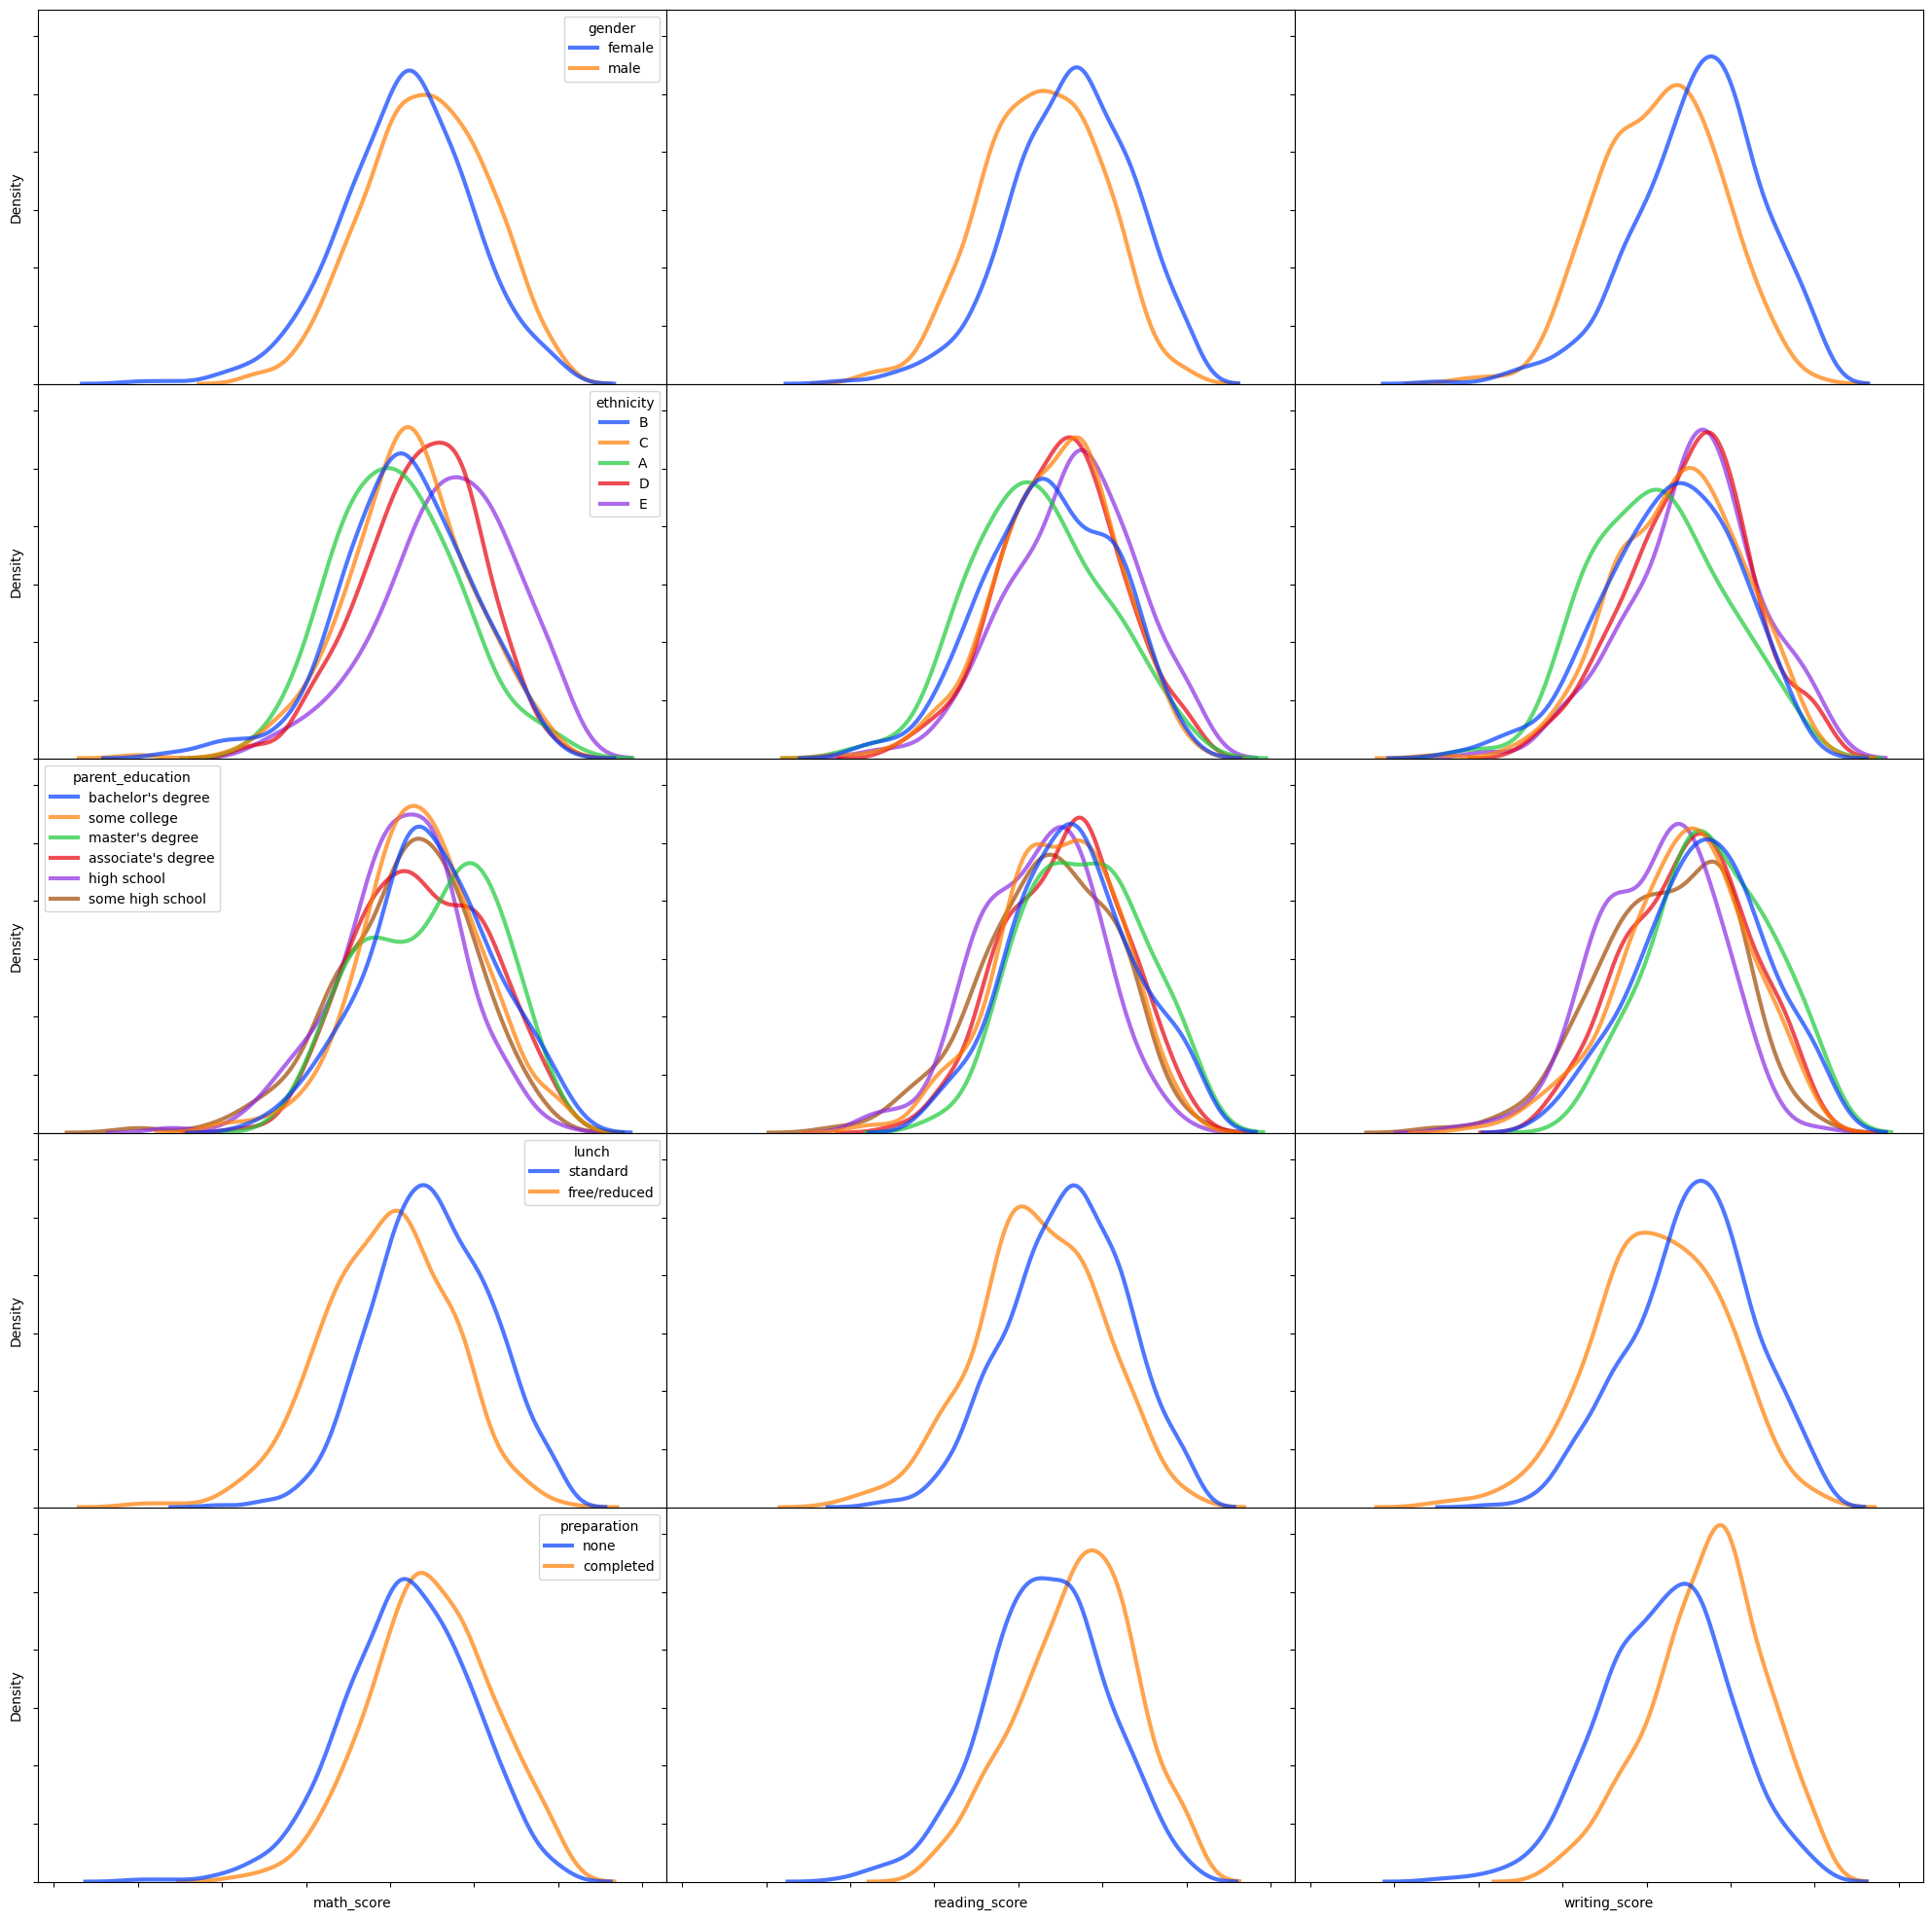

In [104]:
fig, ax = plt.subplots(5, 3, sharey= True, sharex= True, figsize= (25, 25))
for i, cat in enumerate(df.select_dtypes(include= ['object'])):
    for j, score in enumerate(df.select_dtypes(include= ['int64'])):
        sns.kdeplot(
            data= df, x= score, hue= cat,
            fill= False, common_norm= False, palette= 'bright',
            alpha= 0.7, linewidth= 3,
            # multiple= 'fill',
            legend= True if j == 0 else False,
            ax= ax[i, j]
        )
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)

Observaciones:
- Las **mujeres** obtienen **mejores** puntuaciones **menos en matemáticas**.
- El **grupo étnico E** obtiene las **mejores** puntuaciones medias , excepto en escritura.
- Los alumnos del **grupo étnico A** tienen las **calificaciones más bajas**.
- No parece haber mucha relación entre la educación de los padres y la puntuación obtenida.
- Los alumnos con **lunch standard** tienen **mejor puntuación**.
- Los alumnos con **preparación completada** obtienen **mejor puntuación**.

### Relación entre puntuaciones

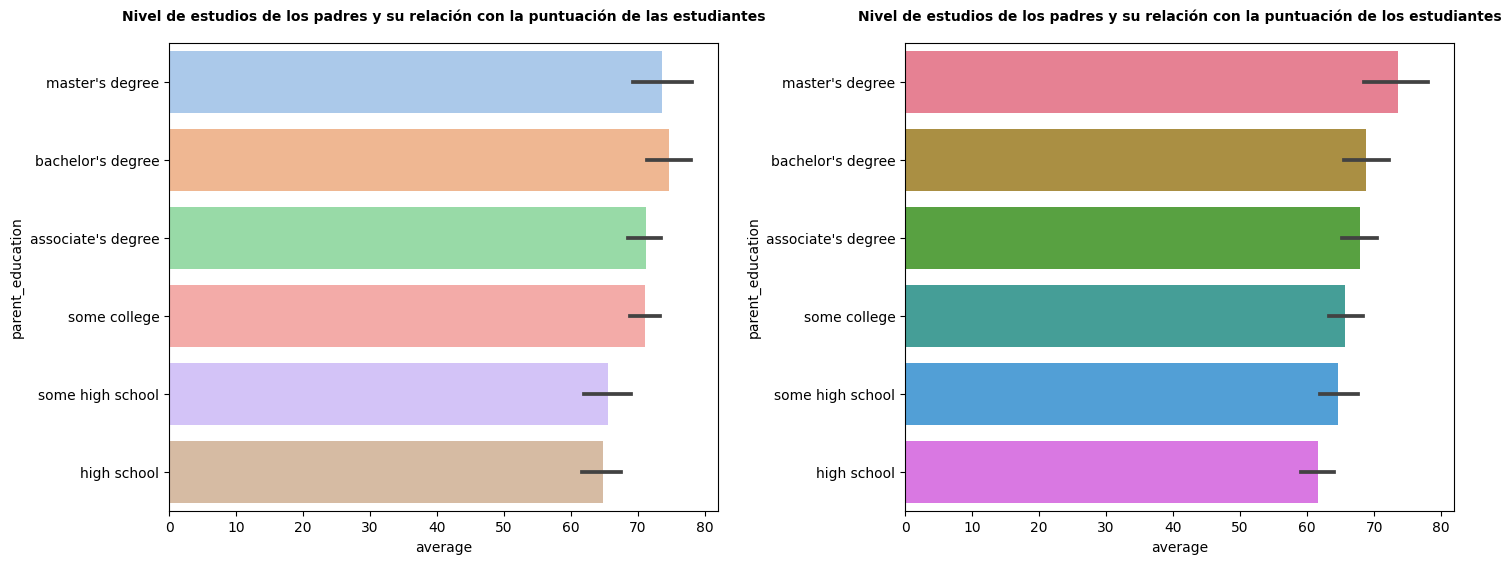

In [107]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
plt.title(label='Nivel de estudios de los padres y su relación con la puntuación de las estudiantes',fontsize=10,fontweight='bold',y=1.03)
sns.barplot(data=df[df['gender']=='female'], y='parent_education', x='average', palette='pastel', 
            order=['master\'s degree','bachelor\'s degree','associate\'s degree', 'some college','some high school','high school'])


plt.subplot(122)
plt.title(label='Nivel de estudios de los padres y su relación con la puntuación de los estudiantes',fontsize=10,fontweight='bold',y=1.03)
sns.barplot(data=df[df['gender']=='male'], y='parent_education', x='average', palette='husl', 
            order=['master\'s degree','bachelor\'s degree','associate\'s degree', 'some college','some high school','high school'])


fig.tight_layout(pad=2)
plt.show()

In [40]:
df.drop(columns='average', inplace=True)
df

,gender,ethnicity,parent_education,lunch,preparation,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,E,master's degree,standard,completed,88,99,95
996,male,C,high school,free/reduced,none,62,55,55
997,female,C,high school,free/reduced,completed,59,71,65
998,female,D,some college,standard,completed,68,78,77


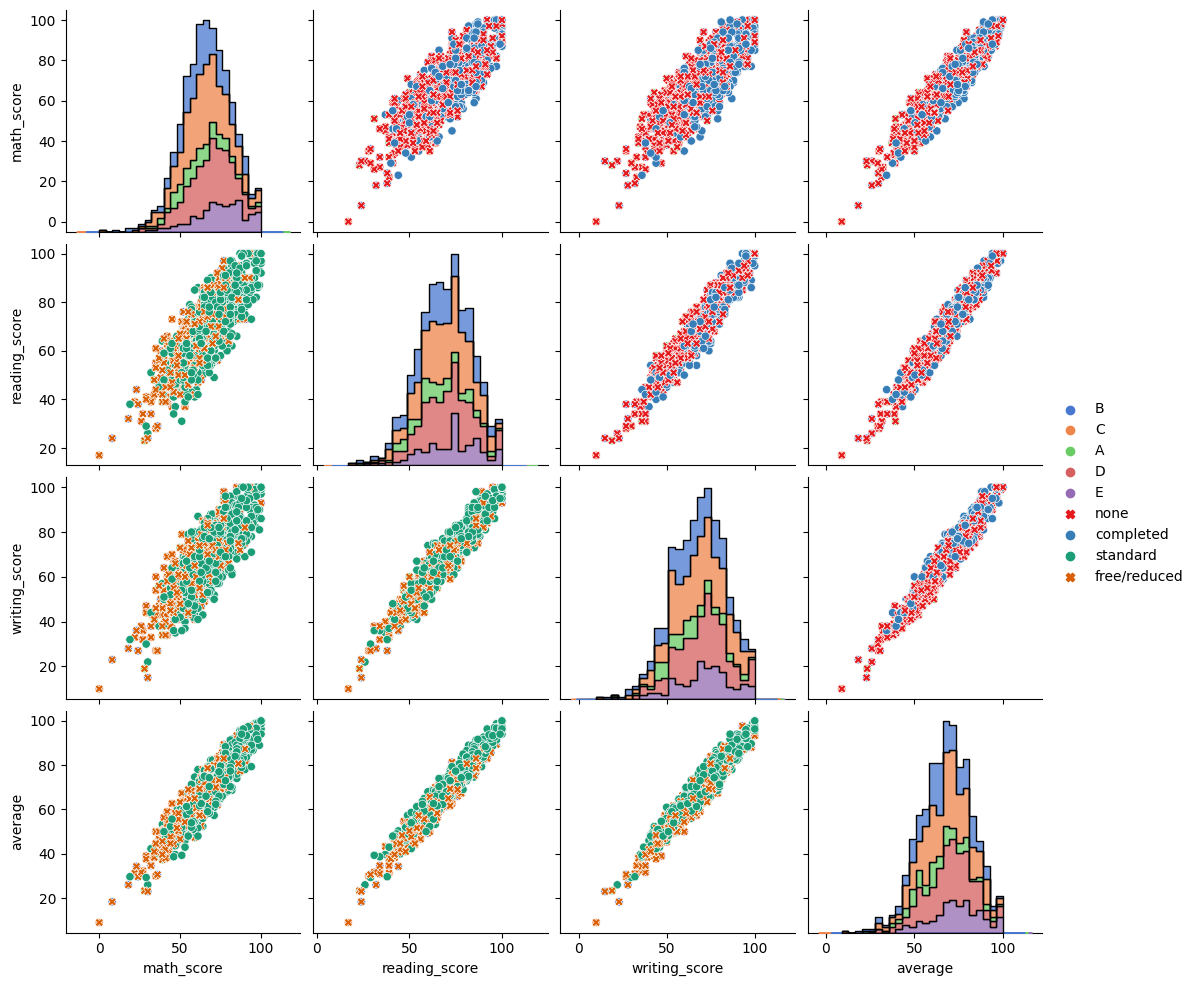

In [110]:
g = sns.pairplot(
    data= df,
    # corner= True,
    hue= 'ethnicity',
    palette= 'muted'
)
g.map_upper(
    sns.scatterplot,
    hue= df.preparation,
    style= df.preparation,
    palette= sns.color_palette("Set1", 2),
    markers = {'completed':'o', 'none':'X'}
)
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_lower(
    sns.scatterplot,
    hue= df.lunch,
    style= df.lunch,
    palette= sns.color_palette("Dark2", 2)
) # markers = {'standard':'o', 'free/reduced':'X'})
g._legend.remove()
g.add_legend(title= '', adjust_subtitles = True)
sns.move_legend(g, 'center right')

Se observa que existe una **correlación lineal** entre las puntuaciones de los distintos exámenes y que es **más fuerte** para los rubros de **escritura y lectura**.

También se confirma que los alumnos con **desayuno standard** tienen **mejores calificaciones** y que los alumnos con **peor calificación** tienen desayuno **gratuito/reducido**.

Además, los alumnos que tienen la **peor calificación** también son los que **no se prepararon**, pero **también** son de los que tienen **mejor calificación**. Los que completaron la preparación tienen calificaciones cercanas a la media.

### Transformando variables categóricas en numéricas

In [112]:
df_num = (
    df
    .assign(
        num_gender = lambda df: df.gender.replace(['male', 'female'], [1, 0])
    )
    .assign(
        num_lunch = lambda df: df.lunch.replace(['standard', 'free/reduced'], [1, 0])
    )
    .assign(
        num_preparation = lambda df: df.preparation.replace(['completed', 'none'], [1, 0])
    )
    .assign(
        num_parent_education = lambda df: df.parent_education.replace(
            list(df.parent_education.unique()),
            [5, 4, 3, 2, 1 , 0]
        )
    )
    .assign(
        num_ethnicity = lambda df: df.ethnicity.replace(
            list(df.ethnicity.unique()),
            [5, 4, 3, 2, 1]
        )
    )
    # Hotones method, not big difference
    # .join(
    #     pd.get_dummies(df.ethnicity)
    # )
    .drop(
        df.select_dtypes(include='object'),
        axis= 1
    )
)
df_num.head()

,math_score,reading_score,writing_score,average,num_gender,num_lunch,num_preparation,num_parent_education,num_ethnicity
0,72,72,74,72.667,0,1,0,5,5
1,69,90,88,82.333,0,1,1,4,4
2,90,95,93,92.667,0,1,0,3,5
3,47,57,44,49.333,1,0,0,2,3
4,76,78,75,76.333,1,1,0,4,4


### Mapa de correlación de variables

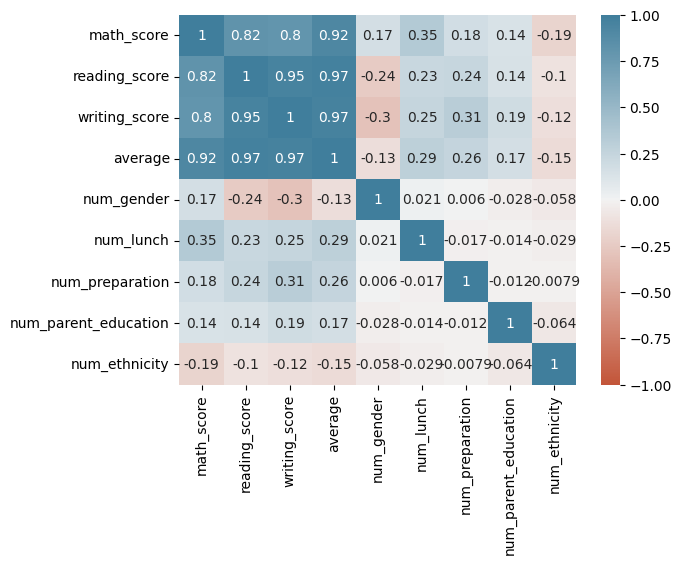

In [114]:
sns.heatmap(
    data= df_num.select_dtypes(exclude= 'object').corr(), annot= True,
    cmap= sns.diverging_palette(20, 230, as_cmap=True),
    center = 0, vmin= -1, vmax= 1
)
plt.savefig("variablescor.png", bbox_inches='tight')
plt.show()

Sólo las **calificaciones** tienen una **correlación** fuerte entre ellas

***
## ¿Podría dar una hipótesis que describa las razones del buen o mal rendimiento de los alumnos en las materias de matemáticas, lectura y escritura?

*Los alumnos que se completan el curso de preparación y que desayunan de forma completa tienen mejores calificaciones.*

In [ ]:
means = {name: 'mean' for name in list(df.select_dtypes(include= 'int'))}

means.update({'gender': 'count'})

(
    df
    .assign(
        parent_education = lambda df: df.parent_education.replace(
            list(df.parent_education.unique()),
            ['universidad', 'preparatoria', 'universidad', 'universidad', 'preparatoria', 'preparatoria']
        )
    )
    .groupby(list(df.select_dtypes(include= 'object')))
    .agg(means)
    .rename(columns={
        'gender': 'count',
        'math_score': 'mean_math',
        'reading_score': 'mean_reading',
        'writing_score': 'mean_writing',
    })
    .assign(
        total_mean = lambda df: (df.mean_math + df.mean_reading + df.mean_writing) / 3
    )
    .sort_values('total_mean', ascending= False)
    .head(20)
)

mean_math  \
gender ethnicity parent_education lunch        preparation              
female E         universidad      standard     completed    84.500000   
                                  free/reduced completed    77.333333   
       A         preparatoria     standard     completed    75.571429   
male   A         universidad      standard     completed    84.750000   
       B         universidad      standard     completed    79.750000   
female D         preparatoria     standard     completed    72.647059   
male   C         universidad      standard     completed    79.642857   
female D         universidad      standard     completed    72.000000   
male   E         preparatoria     standard     completed    82.750000   
female D         universidad      free/reduced completed    67.888889   
       C         universidad      standard     completed    69.360000   
       B         universidad      standard     completed    69.571429   
       C         preparatoria     standard     completed    70.142857   
       B         universidad      free/reduced completed    66.200000   
       D         universidad      standard     none         71.391304   
       E         universidad      standard     none         72.600000   
                 preparatoria     standard     completed    71.571429   
                                               none         74.357143   
male   E         universidad      standard     completed    78.545455   
                                  free/reduced completed    77.285714   

                                                            mean_reading  \
gender ethnicity parent_education lunch        preparation                 
female E         universidad      standard     completed       88.600000   
                                  free/reduced completed       84.666667   
       A         preparatoria     standard     completed       86.142857   
male   A         universidad      standard     completed       78.000000   
       B         universidad      standard     completed       80.000000   
female D         preparatoria     standard     completed       80.000000   
male   C         universidad      standard     completed       78.357143   
female D         universidad      standard     completed       78.428571   
male   E         preparatoria     standard     completed       77.000000   
female D         universidad      free/reduced completed       80.666667   
       C         universidad      standard     completed       80.240000   
       B         universidad      standard     completed       79.142857   
       C         preparatoria     standard     completed       79.238095   
       B         universidad      free/reduced completed       82.800000   
       D         universidad      standard     none            78.260870   
       E         universidad      standard     none            77.933333   
                 preparatoria     standard     completed       76.571429   
                                               none            76.642857   
male   E         universidad      standard     completed       72.181818   
                                  free/reduced completed       71.571429   

                                                            mean_writing  \
gender ethnicity parent_education lunch        preparation                 
female E         universidad      standard     completed       89.100000   
                                  free/reduced completed       87.000000   
       A         preparatoria     standard     completed       85.285714   
male   A         universidad      standard     completed       79.000000   
       B         universidad      standard     completed       78.750000   
female D         preparatoria     standard     completed       83.235294   
male   C         universidad      standard     completed       77.857143   
female D         universidad      standard     completed       83.285714   
male   E         pre

In [34]:
def pandas_pie(data: pd.DataFrame):
    categories = list(data.select_dtypes(include= 'object'))
    fig, ax = plt.subplots(len(categories), 1, figsize= (20, 30))
    num_rows = data.shape[0]
    for i, cat in enumerate(categories):
        counts = data[cat].value_counts().reset_index()
        labels = list(counts['index'])
        nums = np.array(counts[cat]) / num_rows
        wedges, texts, autotexts = ax[i].pie(nums, labels= labels, autopct='%.0f%%')
        ax[i].legend(wedges, labels,
            title= cat,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
    fig.subplots_adjust(wspace=0, hspace=0)

Calculando el promedio de los estudiantes y clasificando la educación de los padres entre universitaria y preparatoria

In [116]:
df_mean = (
    df
    .assign(
        mean = lambda df: (df.math_score + df.reading_score + df.writing_score) / 3
    )
    .assign(
        parent_education = lambda df: df.parent_education.replace(
            list(df.parent_education.unique()),
            ['universidad', 'preparatoria', 'universidad', 'universidad', 'preparatoria', 'preparatoria']
        )
    )
    .sort_values(by= ['mean'], ascending= False)
    .drop(
        list(df.filter(regex= '.*_score').columns),
        axis= 1
    )
)
df_mean.head()


,gender,ethnicity,parent_education,lunch,preparation,average,mean
916,male,E,universidad,standard,completed,100.000,100.000000
458,female,E,universidad,standard,none,100.000,100.000000
962,female,E,universidad,standard,none,100.000,100.000000
114,female,E,universidad,standard,completed,99.667,99.666667
179,female,D,preparatoria,standard,completed,99.000,99.000000


### ¿Cómo son los alumnos con mejores calificaciones?

Seleccionando a los que tienen puntuación mayor a 95

In [117]:
df_mejores = df_mean.loc[df_mean['mean'] > 95]
df_mejores.head()

,gender,ethnicity,parent_education,lunch,preparation,average,mean
916,male,E,universidad,standard,completed,100.000,100.000000
458,female,E,universidad,standard,none,100.000,100.000000
962,female,E,universidad,standard,none,100.000,100.000000
114,female,E,universidad,standard,completed,99.667,99.666667
179,female,D,preparatoria,standard,completed,99.000,99.000000


#### Visualización de la información

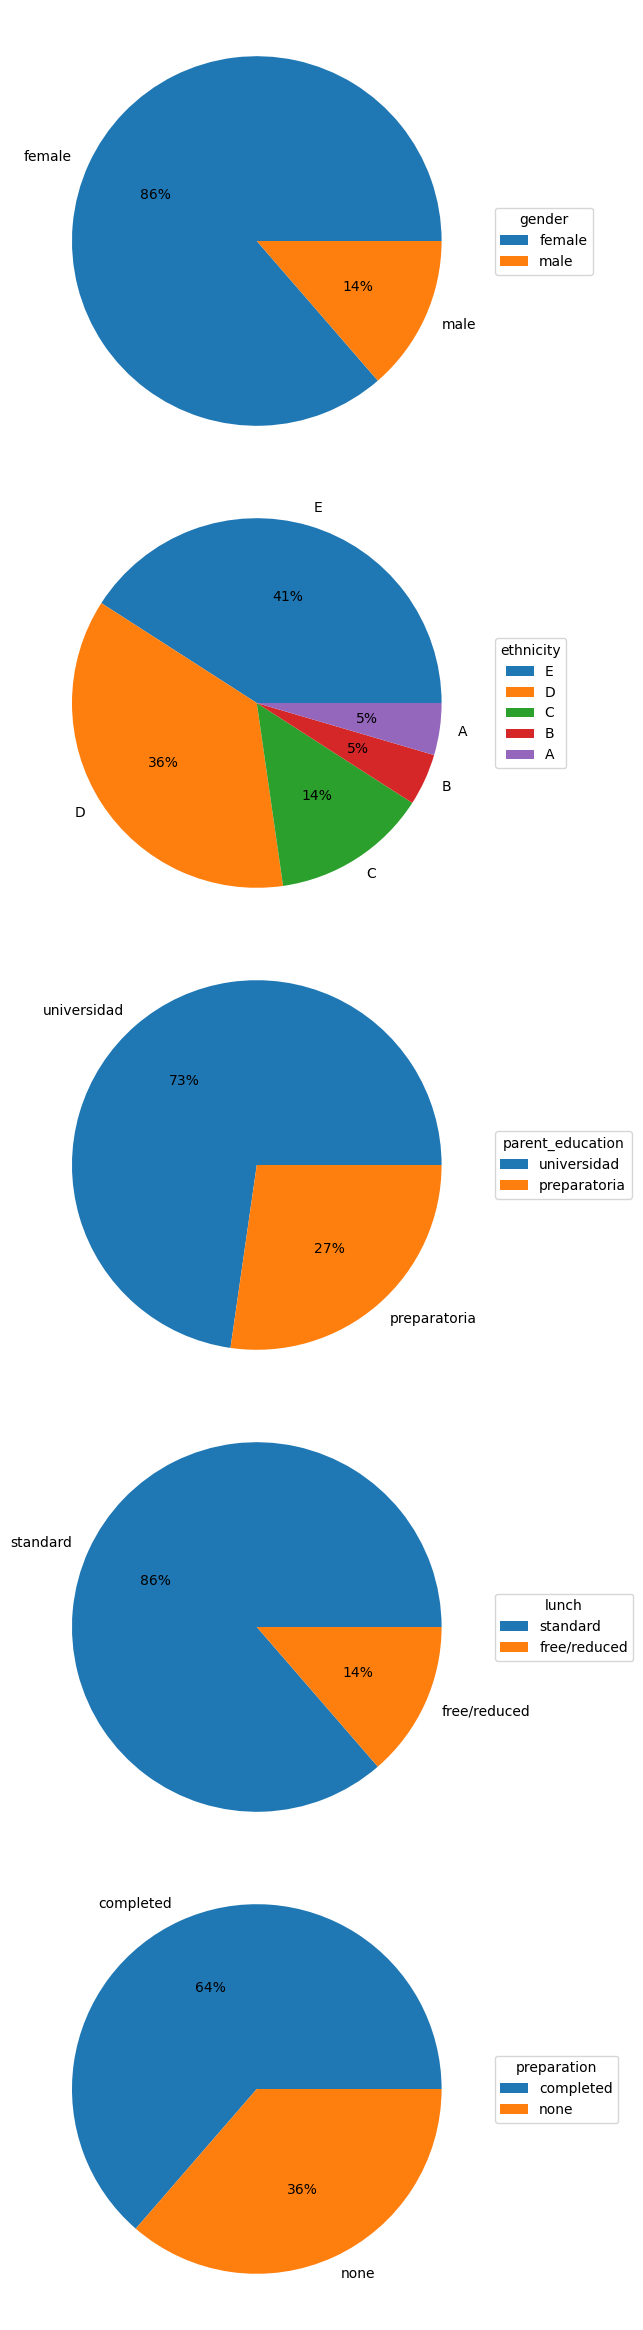

In [121]:
pandas_pie(df_mejores)

### ¿Cómo son los alumnos con peores calificaciones?

Seleccionando los peores, los alumnos que tienen calificación menor a 40

In [123]:
df_peores = df_mean.sort_values(by= 'mean', ascending= True).loc[df_mean['mean'] < 40]
df_peores.head()

,gender,ethnicity,parent_education,lunch,preparation,average,mean
59,female,C,preparatoria,free/reduced,none,9.000,9.000000
980,female,B,preparatoria,free/reduced,none,18.333,18.333333
596,male,B,preparatoria,free/reduced,none,23.000,23.000000
327,male,A,preparatoria,free/reduced,none,23.333,23.333333
17,female,B,preparatoria,free/reduced,none,26.000,26.000000


#### Visualización de la información

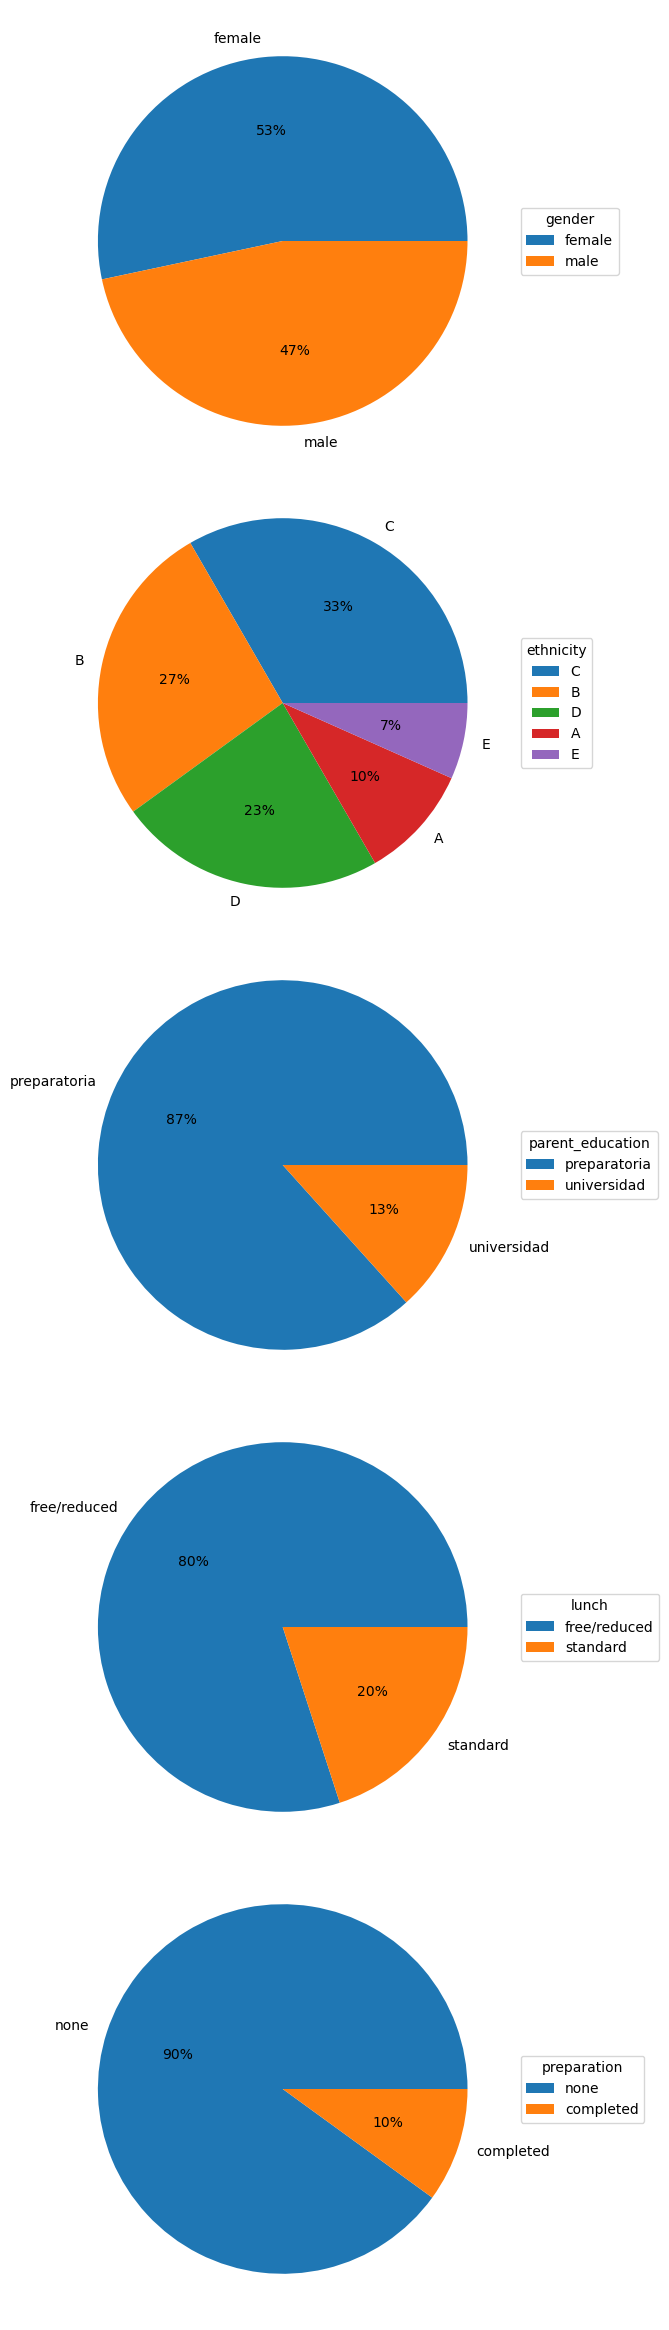

In [126]:
pandas_pie(df_peores)

## ¿Cuál es la diferencia entre los mejores y peores alumnos?

De acuerdo con los resultados, se puede observar una repetición en los patrones que anteriormente habíamos identificado, los alumnos con lunch estándar y con preparación completada tienen mejores calificaciones, el grupo étnico E tiende a tener buena calificación.

Gracias al análisis se encontraron nuevas observaciones las cuales son:

- Las personas con **mejor calificación** generalmente son **mujeres**.
- Al dividir los grados educativos de los padres, nos podemos dar cuenta de que los hijos de padres que completaron alguna clase de **educación universitaria** generalmente tienen **mejores resultados** y viceversa.

In [127]:
# (
#     df
#     .groupby(list(df.select_dtypes(include= 'object').columns))[
#         list(df.select_dtypes(include= 'int'))
#     ].mean()
#     .sort_values(
#         list(df.select_dtypes(include= 'int')),
#         ascending= False
#     )
# )

### Probabilidad de que una persona obtenga una buena calificación (>80) dado que desayunó bien y e hizo la preparación

In [128]:
(
    df_mean
    .assign(
        q_mean = lambda df: df['mean'].map(lambda g: 'good' if g >= 80 else 'bad')
    )
    .groupby(['preparation', 'lunch', 'q_mean'])
    .count()
    .drop(labels= ['gender', 'ethnicity', 'parent_education'], axis=1)
    .rename(columns= {'mean': 'count'})
)

count
preparation lunch        q_mean       
completed   free/reduced bad       105
                         good       26
            standard     bad       146
                         good       81
none        free/reduced bad       211
                         good       13
            standard     bad       340
                         good       78

Sea $P(X)$ la probabilidad de un evento $X$ y los eventos $A$ tener una buena calificación, $L$ tener un buen lunch, $C$ haber completado la preparación se tiene que:

Calculemos la probabilidad de obtener una **buena calificación** si se ha **desayunado bien y se ha completado la preparación**.

$$ P(A | C \cap L) = \frac{P(A \cap C \cap L)}{P(C \cap L)} = \frac{146}{227} = 64\% $$

Comparando con la probabilidad de obtener una **buena calificación** si **NO** se ha **desayunado bien** ni **se ha completado la preparación**.

$$ P(A | C' \cap L') = \frac{P(A \cap C' \cap L')}{P(C' \cap L')} = \frac{13}{224} = 6\% $$

***
# <center>¿Cómo podemos mejorar el rendimiento de los alumnos en las materias de matemáticas, escritura y lectura?</center>
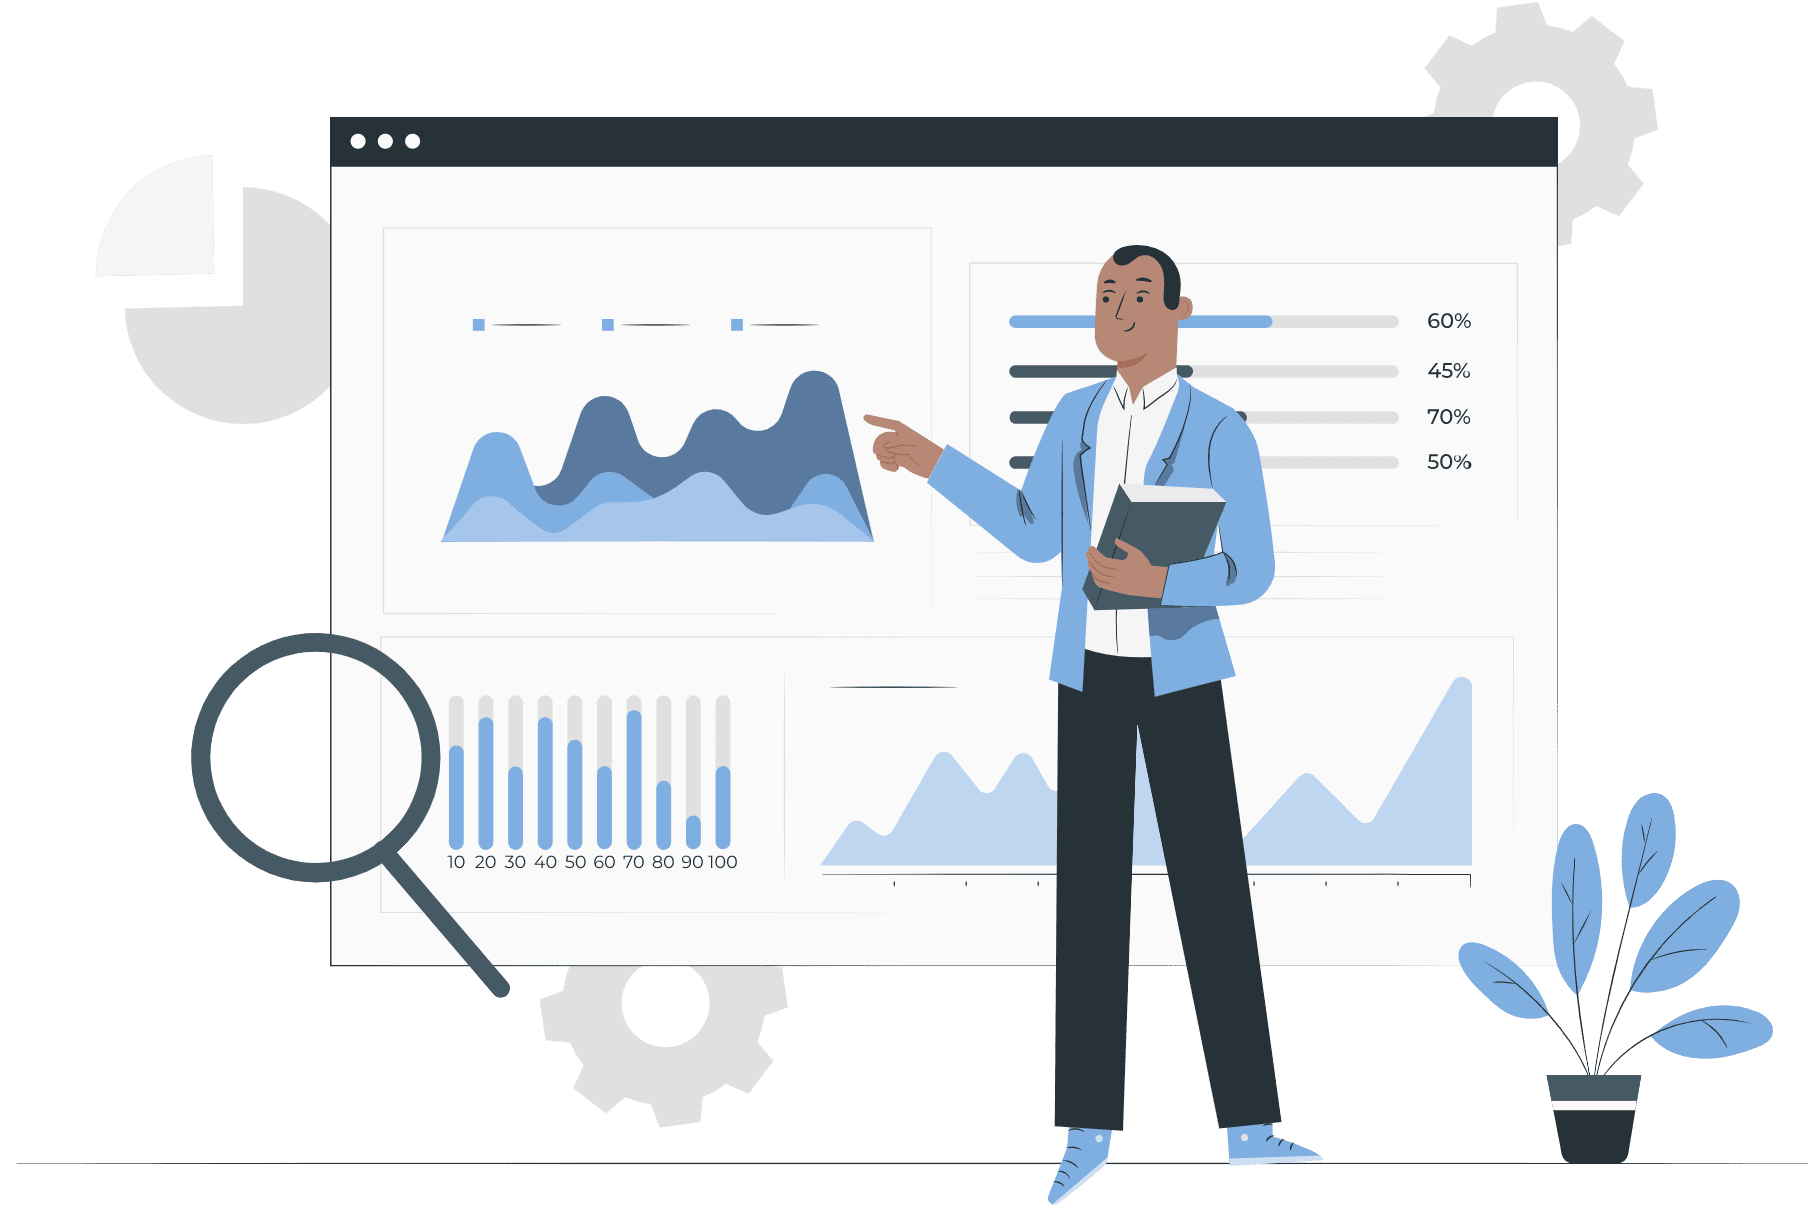

* Asegurando un desayuno standard para los estudiantes
* Los alumnos con bajo rendimiento deben completar un curso de preparación antes de la aplicación de las evaluaciones.


***